In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import pickle

In [62]:
import matplotlib
matplotlib.style.use('publication23')

In [63]:
qrange = linspace(0, 5, 51)
omrange = linspace(-5, 5, 201)

In [64]:
pt = Particle(0.5, qrange, omrange)

In [65]:
T0 = 0.01
T1 = 0.05

In [66]:
ch0 = Channel(pt, pt, T0, screen=0)
ch1 = Channel(pt, pt, T1, screen=0.04)

In [67]:
ch0.populate_T()

In [68]:
ch1.populate_T()

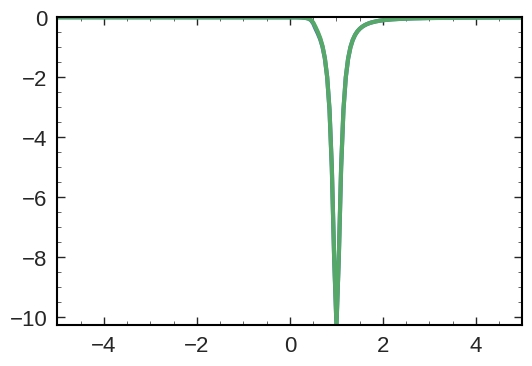

In [69]:
plt.plot(omrange, ch0.ImG2[:, 0])
plt.plot(omrange, ch1.ImG2[:, 0])

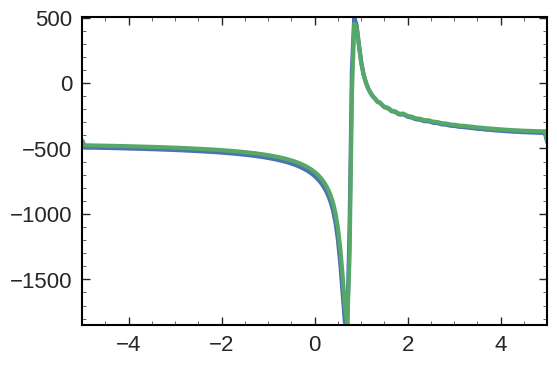

In [70]:
plt.plot(omrange, ch0.TM[:, 0])
plt.plot(omrange, ch1.TM[:, 0])

## Real part from KK

In [79]:
from scipy.integrate import quad

In [82]:
iImT0 = interp1d(omrange, imag(ch0.TM[:, 0]), bounds_error=0, fill_value=0)

In [83]:
ReKK0 = array([quad(iImT0, -5.1, 5.1, weight='cauchy', wvar=o) for o in omrange])

/tmp/ipykernel_46525/2783279466.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ReKK0 = array([quad(iImT0, -5.1, 5.1, weight='cauchy', wvar=o) for o in omrange])


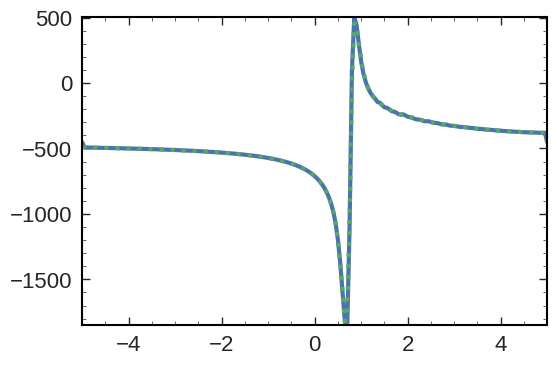

In [87]:
# plt.plot(omrange, ReKK0[:, 0]/pi - 4*pi*ch0.v(0)**2, ls=':')
plt.plot(omrange, real(ch0.TM[:, 0]))

plt.plot(omrange, ReKK0[:, 0]/pi - 4*pi*ch0.v(0)**2, ls=':')

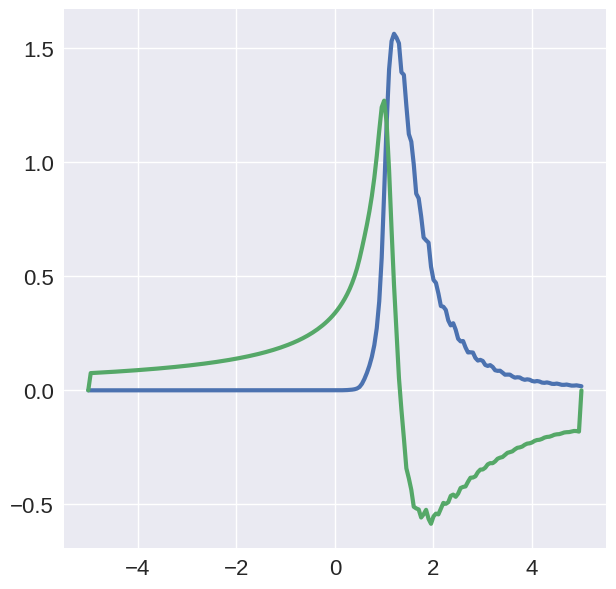

In [26]:
plt.plot(omrange, imag(ch0.XS[0][:, 0]))
plt.plot(omrange, real(ch0.XS[0][:, 0]))

In [28]:
iImX0 = interp1d(omrange, imag(ch0.XS[0][:, 0]), bounds_error=0, fill_value='extrapolate')

In [29]:
ReX0 = array([quad(iImX0, -5.1, 5.1, weight='cauchy', wvar=o) for o in omrange])

/tmp/ipykernel_46525/1168773050.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ReX0 = array([quad(iImX0, -5.1, 5.1, weight='cauchy', wvar=o) for o in omrange])


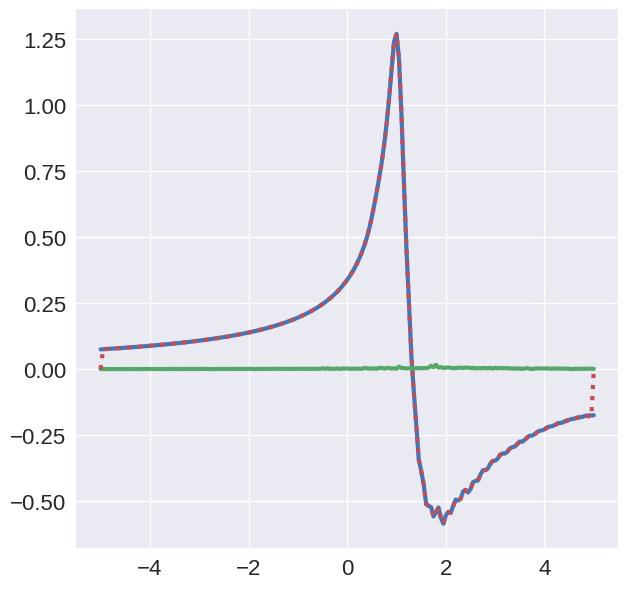

In [34]:
plt.plot(omrange, ReX0/pi)
# plt.plot(omrange, imag(ch0.XS[0][:, 0]))
plt.plot(omrange, real(ch0.XS[0][:, 0]), ls=':')

In [36]:
Z0 = 1/(1 - ch0.XS[0][:, 0])

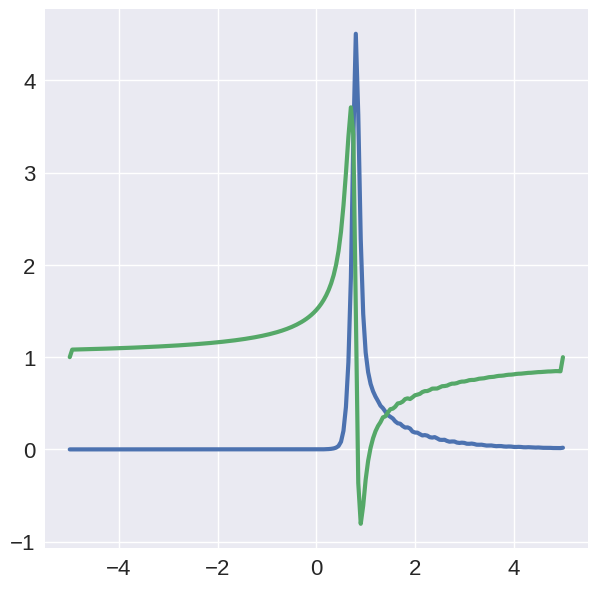

In [38]:
plt.plot(omrange, imag(Z0))
plt.plot(omrange, real(Z0))

In [54]:
iZ0 = interp1d(omrange, imag(Z0), bounds_error=0, fill_value='extrapolate')

In [60]:
ReZ0 = array([quad(iZ0, -5.1, 5.1, weight='cauchy', wvar=o)[0] for o in omrange])

/tmp/ipykernel_46525/4156388426.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ReZ0 = array([quad(iZ0, -5.1, 5.1, weight='cauchy', wvar=o)[0] for o in omrange])


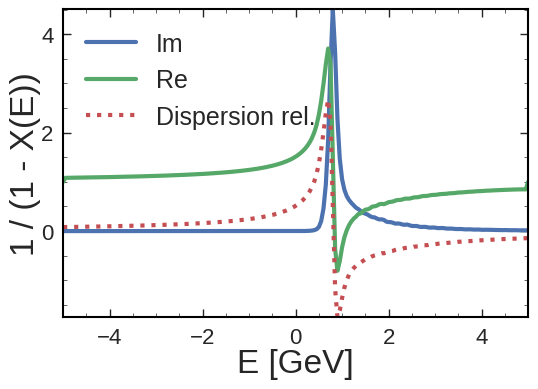

In [91]:
plt.plot(omrange, imag(Z0), label='Im')
plt.plot(omrange, real(Z0), label='Re')
plt.plot(omrange, ReZ0/pi, ls=':', label='Dispersion rel.')

plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel('1 / (1 - X(E))')

plt.savefig('Z_E.pdf', bbox_inches='tight')